In [1]:
import mido
mid = mido.MidiFile('IMSLP221460-WIMA.2591-BWV_1079_1-Part.mid', clip=True)
#mid.tracks
print(mid.tracks)

[MidiTrack([
  MetaMessage('set_tempo', tempo=500000, time=0),
  MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=0, notated_32nd_notes_per_beat=8, time=0),
  MetaMessage('end_of_track', time=0)]), MidiTrack([
  MetaMessage('track_name', name='Violine', time=0),
  MetaMessage('device_name', name='MIDI: Out To MIDI Yoke:  1', time=0),
  Message('program_change', channel=0, program=40, time=0),
  Message('aftertouch', channel=0, value=97, time=0),
  Message('control_change', channel=0, control=7, value=97, time=0),
  Message('pitchwheel', channel=0, pitch=0, time=0),
  Message('control_change', channel=0, control=11, value=63, time=0),
  Message('note_on', channel=0, note=72, velocity=127, time=0),
  Message('note_off', channel=0, note=72, velocity=64, time=730),
  Message('note_on', channel=0, note=75, velocity=127, time=38),
  Message('note_off', channel=0, note=75, velocity=64, time=730),
  Message('note_on', channel=0, note=79, velocity=127, time=38),
  Mess

In [2]:
import numpy as np
notes = np.zeros(372)
print(notes)
bpm = 0
print(type(mid.tracks[0][0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [3]:
tempi = []
for track in mid.tracks:
    for msg in track:
        if msg.type == 'set_tempo':
            tempi.append(msg.tempo)
print(tempi)

[500000]


In [4]:
tempo = tempi[0]
ticks_per_beat = mid.ticks_per_beat
bpm = 60000000/tempo
dt = 60 / (bpm * ticks_per_beat)
print(dt)
print(ticks_per_beat)

0.0013020833333333333
384


[  0.          72.           2.          75.           4.
  79.           6.          80.           8.          71.
  11.          79.          12.          78.          14.
  77.          16.          76.          18.          75.
  21.          74.          22.          73.          23.
  72.          24.          71.          25.          69.
  25.5         67.          26.          72.          27.
  77.          28.          75.          30.          74.
  30.25        75.          30.375       74.          30.5
  75.          30.625       74.          30.75        75.
  30.875       74.          31.          75.          31.125
  74.          31.25        75.          31.375       74.
  31.5         75.          31.625       74.          31.75
  75.          31.875       74.          32.          72.
  33.          84.          34.          78.          35.
  81.          36.          70.          37.          86.
  38.          79.          39.          82.          40.
  75.   

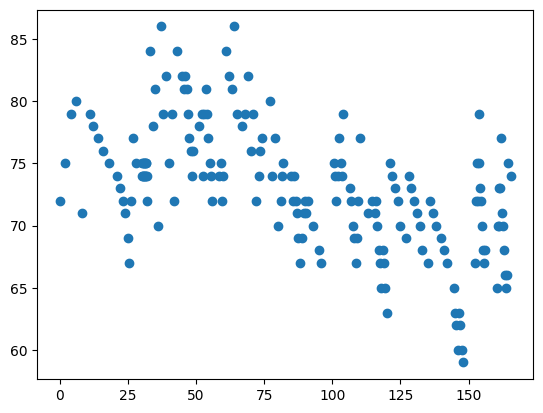

In [5]:
note = 0
beats = []
tones = []
for track in mid.tracks:
    beat = 0
    for msg in track:
        beat += msg.time / ticks_per_beat
        if((msg.type == 'note_on') and (note<371)):
            notes[note] = beat
            beats.append(beat)
            notes[note+1] = msg.note
            tones.append(msg.note)
            
            note += 2
print(notes)
import matplotlib.pyplot as plt
plt.scatter(beats, tones)
plt.show()

40


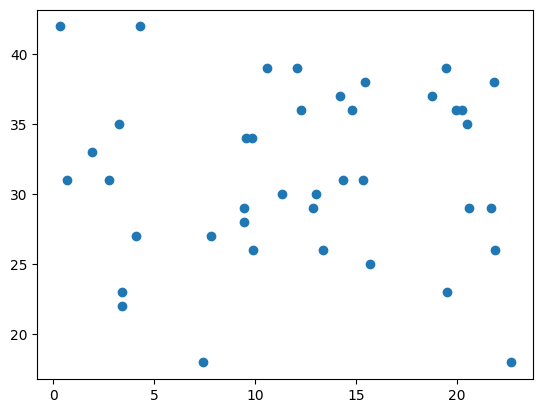

In [6]:
# ::::::::::::::: Random MIDI-Generator::::::::::::::
import random

tonalcenter = random.randint(33, 44) # Van A tot G# om alle toonsoorten te hebben.
rseq = np.zeros(shape=(256,1))
duration = 4 * random.randint(4, 8) # tussen 4 en 8 maten
n_notes = int(round(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.075, 0.255, 0.065, 0.25, 0.02, 0.06, 0.015, 0.245, 0.015])[0] * duration * 0.75 * 1.11))
# maal 0.75 omdat je gemiddeld driekwart gebruikt, bijv Jingle Bells: 3,0625 noten per vierkwartsmaat. +11% marge voor verwijderbare noten

rmoments = []
rtones = []
for rnote in range(0, n_notes):
    rmoments.append(random.uniform(0, duration))
    rtones.append(round(np.random.normal(loc=tonalcenter, scale=6)))
rmoments.sort()

print(len(rtones))
plt.scatter(rmoments, rtones)
plt.show()

In [7]:
rmid = mido.MidiFile()
track = mido.MidiTrack()
rmid.tracks.append(track)
tpb = 1680
rmid.ticks_per_beat = tpb

rest = 0
rnote = 0
for rnote in range(0, n_notes-1):
    if((rmoments[rnote+1]-rmoments[rnote])*tpb <= 840):
        track.append(mido.Message('note_on', channel=0, note=rtones[rnote], velocity=127, time=rest))
        track.append(mido.Message('note_off', channel=0, note=rtones[rnote], velocity=96, time=int(round((rmoments[rnote+1]-rmoments[rnote])*tpb))))
        rest = 0

    elif((rmoments[rnote+1]-rmoments[rnote])*tpb > 840):
        track.append(mido.Message('note_on', channel=0, note=rtones[rnote], velocity=127, time=rest))
        track.append(mido.Message('note_off', channel=0, note=rtones[rnote], velocity=96, time=840))
        rest = int(round((rmoments[rnote+1]-rmoments[rnote])*tpb-840))
        
track.append(mido.Message('note_on', channel=0, note=rtones[n_notes-1], velocity=127, time=rest))
track.append(mido.Message('note_off', channel=0, note=rtones[n_notes-1], velocity=96, time=840))    

track.append(mido.MetaMessage('end_of_track'))

rmid.save('random.mid')

In [8]:
def mid2vec(mid):
    # Bepaal tijdseenheden
    tempi = []
    for track in mid.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                tempi.append(msg.tempo)
    tempo = 500000
    if(len(tempi)>0):
        tempo = tempi[0]
    ticks_per_beat = mid.ticks_per_beat
    bpm = 60000000/tempo
    dt = 60 / (bpm * ticks_per_beat)

    # Maak vector met de noten
    notes = np.zeros(372)
    note = 0
    beats = []
    tones = []
    for track in mid.tracks:
        beat = 0
        for msg in track:
            beat += msg.time / ticks_per_beat
            if((msg.type == 'note_on') and (note<371)):
                notes[note] = beat
                beats.append(beat)
                notes[note+1] = msg.note
                tones.append(msg.note)
                note += 2

    return(notes)
print(mid2vec(mid))

[  0.          72.           2.          75.           4.
  79.           6.          80.           8.          71.
  11.          79.          12.          78.          14.
  77.          16.          76.          18.          75.
  21.          74.          22.          73.          23.
  72.          24.          71.          25.          69.
  25.5         67.          26.          72.          27.
  77.          28.          75.          30.          74.
  30.25        75.          30.375       74.          30.5
  75.          30.625       74.          30.75        75.
  30.875       74.          31.          75.          31.125
  74.          31.25        75.          31.375       74.
  31.5         75.          31.625       74.          31.75
  75.          31.875       74.          32.          72.
  33.          84.          34.          78.          35.
  81.          36.          70.          37.          86.
  38.          79.          39.          82.          40.
  75.   

In [9]:
def randombass():
    tonalcenter = random.randint(33, 44) # Van A tot G# om alle toonsoorten te hebben.
    rseq = np.zeros(shape=(256,1))
    duration = 4 * random.randint(4, 8) # tussen 4 en 8 maten
    n_notes = int(round(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.075, 0.255, 0.065, 0.25, 0.02, 0.06, 0.015, 0.245, 0.015])[0] * duration * 0.75 * 1.11))
    # maal 0.75 omdat je gemiddeld driekwart gebruikt, bijv Jingle Bells: 3,0625 noten per vierkwartsmaat. +11% marge voor verwijderbare noten
    
    rmoments = []
    rtones = []
    for rnote in range(0, n_notes):
        rmoments.append(random.uniform(0, duration))
        rtones.append(round(np.random.normal(loc=tonalcenter, scale=6)))
    rmoments.sort()

    rnote = 0
    rnotes = np.zeros(372)
    halfpos = 0
    while(rnote < 371 and halfpos < n_notes):
        rnotes[rnote] = rmoments[halfpos]
        rnotes[rnote+1] = rtones[halfpos]
        halfpos += 1
        rnote += 2
    return(rnotes)

In [10]:
print(randombass())

[ 0.17837351 41.          0.44314265 22.          0.54717687 38.
  0.62930974 35.          0.65629191 29.          1.47217255 39.
  1.55965874 32.          1.60861281 33.          1.89559868 32.
  1.91783363 42.          2.0122197  43.          2.09044974 35.
  2.2808013  34.          2.54306392 40.          2.58706643 44.
  3.36363206 45.          3.5983866  42.          4.11339315 37.
  4.41930537 44.          4.93116422 40.          5.2189661  33.
  5.3059397  33.          5.48988668 38.          6.03387192 39.
  6.24231142 42.          6.57897535 35.          6.77570906 42.
  6.78463337 35.          6.81378939 40.          7.0602172  37.
  7.64959553 35.          8.17056079 44.          8.5116897  38.
  8.54835653 42.          8.71253821 36.          9.02089162 44.
  9.06584138 38.         10.66226254 37.         10.8930206  41.
 10.90007363 37.         11.30034352 23.         11.35967729 37.
 12.70953051 32.         13.37090671 43.         13.44788984 36.
 13.52390327 43.         

In [11]:
# Import dataset
import os
directory = 'BASSmidis'

filepaths = []
for filename in os.scandir(directory):
    if filename.is_file():
        filepaths.append(filename.path)
print(filepaths)

['BASSmidis\\005 - deadmau5 bass.mid', 'BASSmidis\\006 - hardwell bass.mid', 'BASSmidis\\01 c minor bass.mid', 'BASSmidis\\01 c sharp bass.mid', 'BASSmidis\\01 dms ttl1 bass.mid', 'BASSmidis\\016 - paul van dyk bass.mid', 'BASSmidis\\017 - nicky romero bass.mid', 'BASSmidis\\019 bass.mid', 'BASSmidis\\01a sub bass.mid', 'BASSmidis\\02 c major bass.mid', 'BASSmidis\\02 dms ttl1 bass.mid', 'BASSmidis\\02 f bass.mid', 'BASSmidis\\02 g bass.mid', 'BASSmidis\\024 - dada life bass.mid', 'BASSmidis\\026 - fedde le grand bass.mid', 'BASSmidis\\029 - laidback luke bass.mid', 'BASSmidis\\02b flux bass.mid', 'BASSmidis\\02b nuke em bass.mid', 'BASSmidis\\02c flux bass.mid', 'BASSmidis\\02c nuke em bass.mid', 'BASSmidis\\03 d minor bass.mid', 'BASSmidis\\03 dms ttl1 bass.mid', 'BASSmidis\\034 bass.mid', 'BASSmidis\\035 - chuckie bass.mid', 'BASSmidis\\036 - zatox bass.mid', 'BASSmidis\\037 bass.mid', 'BASSmidis\\039 - cosmic gate bass.mid', 'BASSmidis\\03b neuro funk bass.mid', 'BASSmidis\\03b sub

In [12]:
dataset = []
for path in filepaths:
    mid = mido.MidiFile(path, clip=True)
    dataset.append(mid2vec(mid))

In [13]:
def adderror(notes):
    noteserr = np.copy(notes)
    n_notes = int(round(np.count_nonzero(noteserr)/2))
    dice = random.randint(1, 10)
    if(dice < 7):
        errpos = random.randint(0, n_notes - 1) * 2
        noteserr[errpos] += np.random.normal(loc=0, scale=1)
    else:
        errpos = random.randint(1, n_notes) * 2 - 1
        noteserr[errpos] += round(np.random.normal(loc=0, scale=6))
    return(noteserr)

In [14]:
# Genereer basslines met error

errorN = []
errorN_2 = []
errorN_3 = []
errorN_4 = []
piece = 0
numpieces = len(dataset)
while(piece < numpieces):
    #print(filepaths[piece])
    numnotes = int(round(np.count_nonzero(dataset[piece])))
    e1 = dataset[piece]
    e2 = dataset[piece]
    e3 = dataset[piece]
    e4 = dataset[piece]
    for cycle in range(0, numnotes):
        e1 = adderror(e1)
        e2 = adderror(e2)
        e3 = adderror(e3)
        e4 = adderror(e4)
    errorN.append(e1)
    errorN_2.append(e2)
    errorN_3.append(e3)
    errorN_4.append(e4)
    piece += 1
piece = 0

In [15]:
def normalize(notes):
    note = 0
    while(note < 372):
        notes[note] *= 1/24 # gemiddeld aantal beats in een random-fragment
        notes[note+1] = (notes[note+1])/60 # Middle C = 1
        note += 2
    return(notes)

In [16]:
def denormalize(notes):
    note = 0
    while(note < 372):
        notes[note] *= 24 # gemiddeld aantal beats in een random-fragment
        notes[note+1] = int(round((notes[note+1])*60)) # Middle C = 60
        note += 2
    return(notes)

In [17]:
piece = 0
normalizeddata = np.copy(dataset)
normalizederrorN = np.copy(errorN)
normalizederrorN_2 = np.copy(errorN_2)
normalizederrorN_3 = np.copy(errorN_3)
normalizederrorN_4 = np.copy(errorN_4)
while(piece < numpieces):
    normalizeddata[piece] = normalize(normalizeddata[piece])
    normalizederrorN[piece] = normalize(normalizederrorN[piece])
    normalizederrorN_2[piece] = normalize(normalizederrorN_2[piece])
    normalizederrorN_3[piece] = normalize(normalizederrorN_3[piece])
    normalizederrorN_4[piece] = normalize(normalizederrorN_4[piece])
    piece += 1

In [18]:
y = np.concatenate((normalizeddata, normalizeddata, normalizeddata, normalizeddata))
X = np.concatenate((normalizederrorN, normalizederrorN_2, normalizederrorN_3, normalizederrorN_4))

## === NEURAAL NET 2, TRAINEN OP N_notes fouten, 1 net ===

In [19]:
import tensorflow as tf
import keras
from keras import layers

model = keras.Sequential()
model.add(layers.Dense(372, activation='tanh', input_shape=(372,)))
model.add(layers.Dense(372, activation='tanh'))
model.add(layers.Dense(372, activation='tanh'))
model.add(layers.Dense(372, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 372)               138756    
                                                                 
 dense_1 (Dense)             (None, 372)               138756    
                                                                 
 dense_2 (Dense)             (None, 372)               138756    
                                                                 
 dense_3 (Dense)             (None, 372)               138756    
                                                                 
Total params: 555024 (2.12 MB)
Trainable params: 555024 (2.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='huber', optimizer=opt, metrics='accuracy')
model.fit(X, y, batch_size=2, epochs=2, validation_split=0.1)

Epoch 1/2
6466/6466 [==============================] - 118s 18ms/step - loss: 31.0456 - accuracy: 0.0438 - val_loss: 0.0468 - val_accuracy: 0.0564
Epoch 2/2
6466/6466 [==============================] - 101s 16ms/step - loss: 31.0361 - accuracy: 0.0602 - val_loss: 0.0421 - val_accuracy: 0.0689


In [21]:
#model.save('Model2mod1.keras')

In [26]:
model2 = keras.models.load_model('model1.keras')
noise = normalize(randombass())
n_notes = int(round(np.count_nonzero(noise)/2))
input = tf.expand_dims(noise, axis=0)
print(input)
cycle = 0
while(cycle < int(round(n_notes))):
    input = model.predict(input)
    cycle += 1
output = input
print(output)

tf.Tensor(
[[0.00258112 0.71666667 0.00778315 0.58333333 0.01671266 0.6
  0.01956154 0.68333333 0.03492487 0.45       0.0423105  0.56666667
  0.05912673 0.48333333 0.07835781 0.61666667 0.08253788 0.71666667
  0.08604298 0.58333333 0.08962386 0.58333333 0.08994522 0.48333333
  0.09174547 0.61666667 0.09971986 0.28333333 0.11207049 0.46666667
  0.12148154 0.46666667 0.12572305 0.43333333 0.13648783 0.53333333
  0.14948258 0.6        0.15146941 0.6        0.15201281 0.76666667
  0.15705437 0.41666667 0.16708659 0.7        0.17102659 0.5
  0.17663489 0.68333333 0.18591978 0.6        0.18813144 0.55
  0.20124053 0.4        0.20318825 0.48333333 0.20552822 0.58333333
  0.20836378 0.7        0.21613818 0.45       0.22352584 0.5
  0.22849653 0.48333333 0.22899439 0.61666667 0.2333018  0.48333333
  0.23511738 0.46666667 0.25178385 0.46666667 0.25480263 0.33333333
  0.26345591 0.68333333 0.27689501 0.63333333 0.2806305  0.65
  0.28203472 0.45       0.28740134 0.55       0.29392677 0.28333333
  

In [27]:
print(output[0])
AInotes = denormalize(output[0])
print(output[0])
print(AInotes)

[0.0000000e+00 7.5458801e-01 6.8639889e-02 7.3356396e-01 8.6066820e-02
 7.6581812e-01 0.0000000e+00 7.5697428e-01 0.0000000e+00 7.9376936e-01
 0.0000000e+00 8.0697697e-01 2.3146728e-01 7.4240965e-01 1.9780020e-01
 7.3984176e-01 2.3537302e-01 7.3699731e-01 2.2722194e-01 7.0895827e-01
 2.4792087e-01 7.2115928e-01 2.7185470e-01 6.3261384e-01 2.2097169e-01
 6.3001418e-01 2.4145207e-01 6.0368860e-01 0.0000000e+00 5.5311626e-01
 2.5570077e-01 5.3481370e-01 1.6873692e-01 4.5642722e-01 2.6911226e-01
 4.2100418e-01 2.1634617e-01 3.4645769e-01 1.3681236e-01 4.2844629e-01
 1.6881096e-01 3.5030577e-01 1.6837214e-01 0.0000000e+00 8.5481338e-02
 3.0311948e-01 1.3248706e-01 3.1203324e-01 1.3322897e-01 2.5389293e-01
 9.8018378e-02 2.4146980e-01 8.9930236e-02 2.1303098e-01 1.3402928e-01
 1.8898708e-01 0.0000000e+00 1.4594820e-01 1.0205814e-01 1.2709902e-01
 0.0000000e+00 5.4069802e-02 0.0000000e+00 1.0522766e-01 0.0000000e+00
 1.1553066e-02 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

In [28]:
def notes2mid(notes):
    mid = mido.MidiFile()
    track = mido.MidiTrack()
    mid.tracks.append(track)
    tpb = 1680
    mid.ticks_per_beat = tpb

    points = []
    index = 0
    while(index < 372):
        if((notes[index+1] > 15) and (notes[index+1] < 128)):
            points.append([notes[index], notes[index+1]])
        index = index + 2

    print(len(points))
    index = 0
    points = sorted(points)
    n_notes = len(points)
    moments = []
    tones = []
    while(index < n_notes):
        moments.append(points[index][0])
        tones.append(points[index][1])
        index += 1
    
    rest = 0
    note = 0
    for note in range(0, n_notes-1):
        if((moments[note+1]-moments[note])*tpb <= 840):
            track.append(mido.Message('note_on', channel=0, note=int(tones[note]), velocity=127, time=rest))
            track.append(mido.Message('note_off', channel=0, note=int(tones[note]), velocity=96, time=int(round((moments[note+1]-moments[note])*tpb))))
            rest = 0
    
        elif((moments[note+1]-moments[note])*tpb > 840):
            track.append(mido.Message('note_on', channel=0, note=int(tones[note]), velocity=127, time=rest))
            track.append(mido.Message('note_off', channel=0, note=int(tones[note]), velocity=96, time=840))
            rest = int(round((moments[note+1]-moments[note])*tpb-840))
            
    track.append(mido.Message('note_on', channel=0, note=int(tones[n_notes-1]), velocity=127, time=rest))
    track.append(mido.Message('note_off', channel=0, note=int(tones[n_notes-1]), velocity=96, time=840))    
    
    track.append(mido.MetaMessage('end_of_track'))
    
    mid.save('AI2.mid')
    plt.scatter(moments, tones)
    plt.show()
    return("Saved AI2.mid")

23


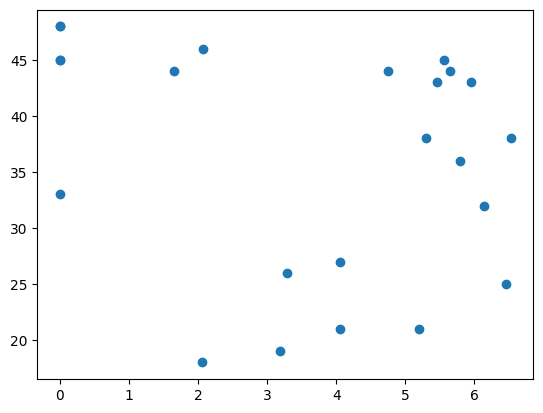

Saved AI2.mid


In [29]:
print(notes2mid(AInotes))